# Heat equation

## libs

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML
from scipy import special

## initialization

In [31]:
COURANT=0.5
LAMBDA = 0.5

X_max = 15
T_max = 30
X_min = T_min = 0
U_0 = 25

NUMBER_X = 50
NUMBER_T = int(LAMBDA * (T_max - T_min) * NUMBER_X**2 / (X_max - X_min)**2 / COURANT)

In [32]:
X_RANGE = np.linspace(X_min, X_max, NUMBER_X)
T_RANGE = np.linspace(T_min, T_max, NUMBER_T)

X_STEP = X_RANGE[1] - X_RANGE[0]
T_STEP = T_RANGE[1] - T_RANGE[0]

In [33]:
X, T = np.meshgrid(X_RANGE, T_RANGE, indexing='ij')

# Boundary / initial conditions
U = np.zeros_like(X)
U[:, 0] = 0
U[0, :] = U_0
U[-1, :] = 0

U_EXACT = U.copy()

## main procedure

In [34]:
for j in tqdm_notebook(list(range(0, NUMBER_T-1))):
    current_u = U[:, j]

    rhs = LAMBDA * (np.roll(current_u, -1) - 2 * current_u + np.roll(current_u, +1)) / (X_STEP**2)
    
    mask = np.zeros_like(rhs).astype(bool)
    mask[1:-1] = True
    
    U[mask, j+1] = T_STEP * rhs[mask] + U[mask, j]

In [35]:
mask = np.zeros_like(T_RANGE).astype(bool)
mask[1:] = True
U_EXACT = U_0 * (1 - special.erf(X[:,mask] / (2 * np.sqrt(LAMBDA * T[:,mask]))))

In [36]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

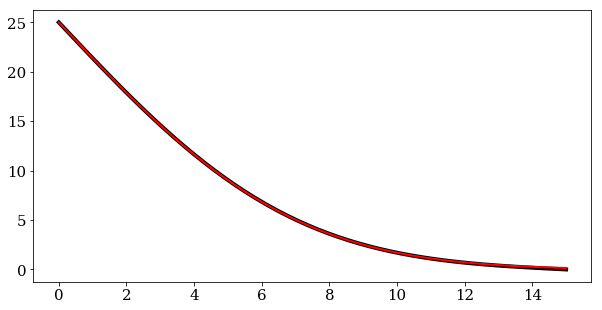

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X_RANGE, U[:,-1], lw=4, color='black', label=None)
ax.plot(X_RANGE, U_EXACT[:,-1], lw=2, color='red', label=None)

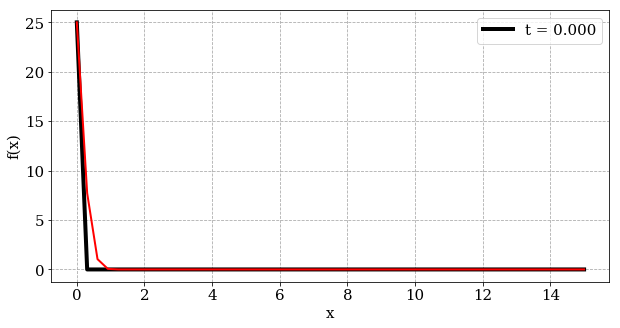

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

l1, = ax.plot(X_RANGE, U[:,-1], lw=4, color='black', label=None)
l2, = ax.plot(X_RANGE, U_EXACT[:,-1], lw=2, color='red', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, U[:, i])
    l1.set_label('t = ' + '%.3f' %(i * T_STEP))
    l2.set_data(X_RANGE, U_EXACT[:, i])

    legend = plt.legend(loc='upper right')
    return l1, l2, legend

ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0, NUMBER_T-2, 50).astype(int), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())